In [3]:
# Importation des packaques et du dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Importation du fichier de scraping
df = pd.read_csv('vgsales_scraping.csv')
#print(df.isnull().sum())

# Scraping Metascore
# On recherche les nombres dans Metascore correspond respectivement à la note et au nombre de vote
r = re.compile(r"[0-9]+")

# On crée les 2 conteneurs qui vont recueillir ces infos
metascorewrap_note = []
metascorewrap_nbvote = []
count = 0

for i in df['metascorewrap']:
    metascorewrap = r.findall(i)
    if len(metascorewrap)>1 :
        #print(count," : ",metascorewrap)
        #print(type(metascorewrap_note))
        metascorewrap_note.append(metascorewrap[0])
        metascorewrap_nbvote.append(metascorewrap[1])
    else :
        metascorewrap_note.append(np.nan)
        metascorewrap_nbvote.append(np.nan)
    count+=1
    
# On recherche les floats dans Userscore correspond respectivement à la note et au nombre de vote
r = re.compile(r"[0-9]+\.?[0-9]+")

# On crée les 2 conteneurs qui vont recueillir ces infos
userscorewrap_note = []
userscorewrap_nbvote = []
count = 0
df['metaNote']=metascorewrap_note
df['metaNbVote']=metascorewrap_nbvote

for i in df['userscorewrap']:
    userscorewrap = r.findall(i)
    if len(userscorewrap)>1 :
        #print(count," : ",userscorewrap)
        #print(type(metascorewrap_note))
        userscorewrap_note.append(userscorewrap[0])
        userscorewrap_nbvote.append(userscorewrap[1])
    else :
        userscorewrap_note.append(np.nan)
        userscorewrap_nbvote.append(np.nan)
    count+=1
df['userNote']=userscorewrap_note
df['userNbVote']=userscorewrap_nbvote
    
# Comparatif entre le nom du dataset et le nom sur Metacritic
samename = []
for i,j in zip(df['Name'],df['gamename']):
    if (i in j) or (j in i) : # Je fais le test dans les 2 sens, voir index 16595
        samename.append(1)
    else :
        samename.append(0)
df['samename']=samename

#print(df['metascorewrap'][52])
#print(df['userscorewrap'][0])

df=df.drop(['metascorewrap','developper','userscorewrap','gamename','nbvotes','description','top','nbratings','metascore','ratings'],axis=1)

# Calcul du nombre de bons jeux (même nom) trouvés
print(df['samename'].value_counts())
print("length :",len(df))

# Suppression des mauvais jeux (pas le même nom)
df.drop(df.loc[df['samename']==0].index, inplace=True)

1    11540
0     5058
Name: samename, dtype: int64
length : 16598


In [4]:
# Recherche des données manquantes
df.isnull().sum()

# Duplication de df dans df_visu pour les visualisations
df_visu = df

# Remplacement des années manquantes par 0 (autres)
df_visu[['Year','metaNote','metaNbVote','userNote','userNbVote']] = df_visu[['Year','metaNote','metaNbVote','userNote','userNbVote']].fillna(0)

# Remplacement des Publishers manquants par unknown
df_visu['Publisher'] = df['Publisher'].fillna('unknown')

#print(df_visu.isnull().sum())
#df_visu.head(20)

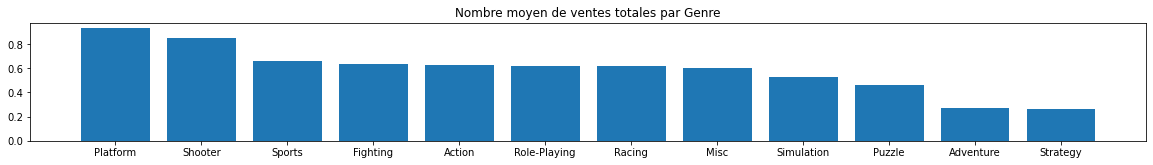

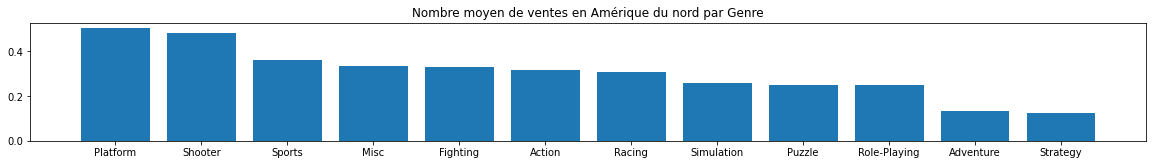

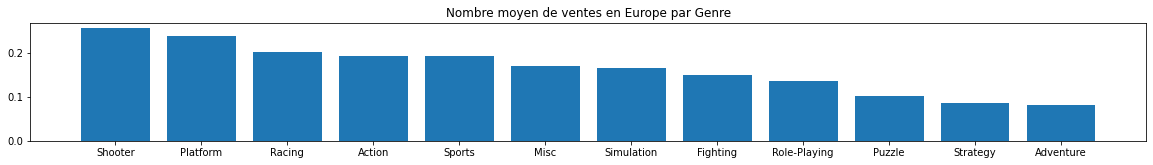

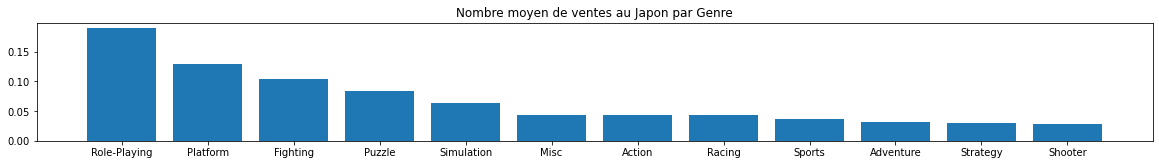

In [5]:
# Visualisation par genre

# Ventes par genre 
salesByGenre = df_visu.groupby('Genre').agg({'Global_Sales':'mean'}).sort_values(by='Global_Sales',ascending=False)

# Global 
salesByGenreG = df_visu.groupby('Genre').agg({'Global_Sales':'mean'}).sort_values(by='Global_Sales',ascending=False)
plt.figure(figsize=(20,10))
plt.subplot(4,1,1)
#plt.hist()
plt.bar(salesByGenreG['Global_Sales'].index,salesByGenreG['Global_Sales']);
plt.title('Nombre moyen de ventes totales par Genre');

# NA 
salesByGenreNA = df_visu.groupby('Genre').agg({'NA_Sales':'mean'}).sort_values(by='NA_Sales',ascending=False)

plt.figure(figsize=(20,10))
plt.subplot(4,1,2)
#plt.hist()
plt.bar(salesByGenreNA['NA_Sales'].index,salesByGenreNA['NA_Sales']);
#plt.bar(df.Genre,df.Global_Sales.mean());
plt.title('Nombre moyen de ventes en Amérique du nord par Genre');

# EU
salesByGenreEU = df_visu.groupby('Genre').agg({'EU_Sales':'mean'}).sort_values(by='EU_Sales',ascending=False)

plt.figure(figsize=(20,10))
plt.subplot(4,1,3)
#plt.hist()
plt.bar(salesByGenreEU['EU_Sales'].index,salesByGenreEU['EU_Sales']);
#plt.bar(df.Genre,df.Global_Sales.mean());
plt.title('Nombre moyen de ventes en Europe par Genre');

# JP
salesByGenreJP = df_visu.groupby('Genre').agg({'JP_Sales':'mean'}).sort_values(by='JP_Sales',ascending=False)

plt.figure(figsize=(20,10))
plt.subplot(4,1,4)
#plt.hist()
plt.bar(salesByGenreJP['JP_Sales'].index,salesByGenreJP['JP_Sales']);
#plt.bar(df.Genre,df.Global_Sales.mean());
plt.title('Nombre moyen de ventes au Japon par Genre');

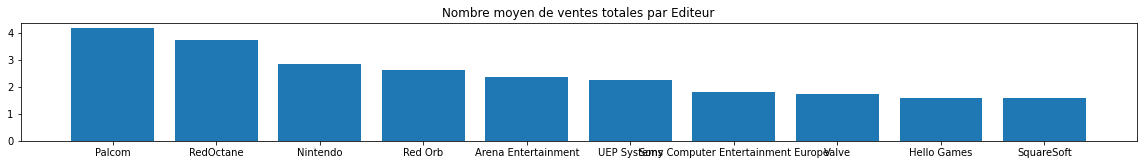

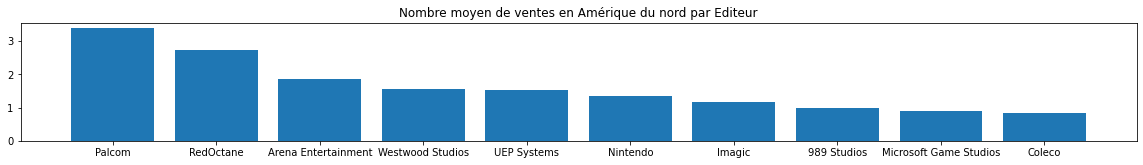

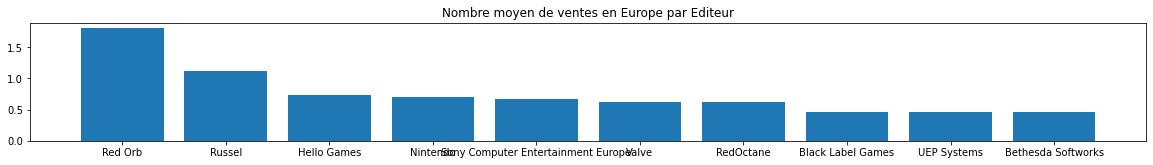

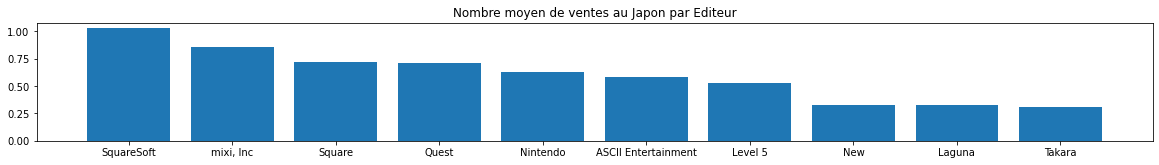

In [6]:
# Visualisation par Editeur

# Global 
salesByPublisherG = df_visu.groupby('Publisher').agg({'Global_Sales':'mean'}).sort_values(by='Global_Sales',ascending=False).head(10)
plt.figure(figsize=(20,10))
plt.subplot(4,1,1)
#plt.hist()
plt.bar(salesByPublisherG['Global_Sales'].index,salesByPublisherG['Global_Sales']);
plt.title('Nombre moyen de ventes totales par Editeur');

# NA 
salesByPublisherNA = df_visu.groupby('Publisher').agg({'NA_Sales':'mean'}).sort_values(by='NA_Sales',ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.subplot(4,1,2)
#plt.hist()
plt.bar(salesByPublisherNA['NA_Sales'].index,salesByPublisherNA['NA_Sales']);
#plt.bar(df.Genre,df.Global_Sales.mean());
plt.title('Nombre moyen de ventes en Amérique du nord par Editeur');

# EU
salesByPublisherEU = df_visu.groupby('Publisher').agg({'EU_Sales':'mean'}).sort_values(by='EU_Sales',ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.subplot(4,1,3)
#plt.hist()
plt.bar(salesByPublisherEU['EU_Sales'].index,salesByPublisherEU['EU_Sales']);
#plt.bar(df.Genre,df.Global_Sales.mean());
plt.title('Nombre moyen de ventes en Europe par Editeur');

# JP
salesByPublisherJP = df_visu.groupby('Publisher').agg({'JP_Sales':'mean'}).sort_values(by='JP_Sales',ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.subplot(4,1,4)
#plt.hist()
plt.bar(salesByPublisherJP['JP_Sales'].index,salesByPublisherJP['JP_Sales']);
#plt.bar(df.Genre,df.Global_Sales.mean());
plt.title('Nombre moyen de ventes au Japon par Editeur');

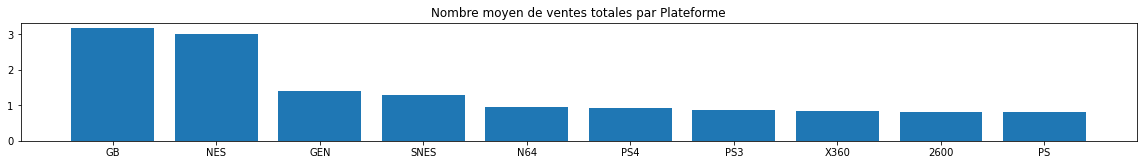

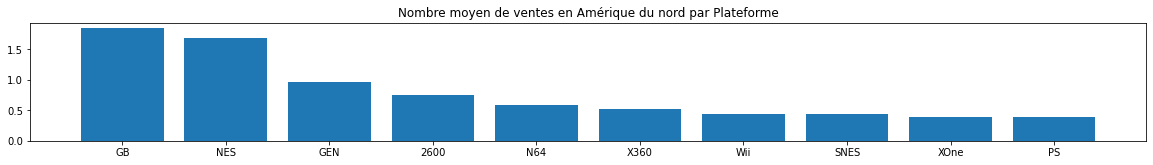

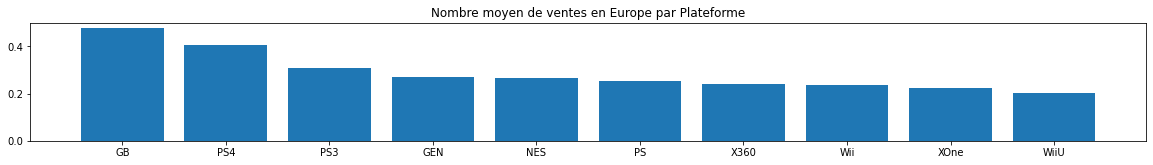

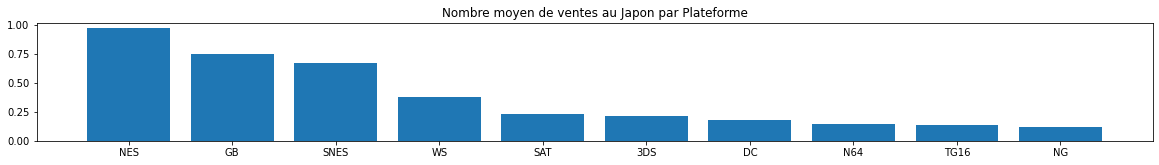

In [8]:
# Visualisation par Editeur

# Global 
salesByPlatformG = df_visu.groupby('Platform').agg({'Global_Sales':'mean'}).sort_values(by='Global_Sales',ascending=False).head(10)
plt.figure(figsize=(20,10))
plt.subplot(4,1,1)
#plt.hist()
plt.bar(salesByPlatformG['Global_Sales'].index,salesByPlatformG['Global_Sales']);
plt.title('Nombre moyen de ventes totales par Plateforme');

# NA 
salesByPlatformNA = df_visu.groupby('Platform').agg({'NA_Sales':'mean'}).sort_values(by='NA_Sales',ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.subplot(4,1,2)
#plt.hist()
plt.bar(salesByPlatformNA['NA_Sales'].index,salesByPlatformNA['NA_Sales']);
#plt.bar(df.Genre,df.Global_Sales.mean());
plt.title('Nombre moyen de ventes en Amérique du nord par Plateforme');

# EU
salesByPlatformEU = df_visu.groupby('Platform').agg({'EU_Sales':'mean'}).sort_values(by='EU_Sales',ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.subplot(4,1,3)
#plt.hist()
plt.bar(salesByPlatformEU['EU_Sales'].index,salesByPlatformEU['EU_Sales']);
#plt.bar(df.Genre,df.Global_Sales.mean());
plt.title('Nombre moyen de ventes en Europe par Plateforme');

# JP
salesByPlatformJP = df_visu.groupby('Platform').agg({'JP_Sales':'mean'}).sort_values(by='JP_Sales',ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.subplot(4,1,4)
#plt.hist()
plt.bar(salesByPlatformJP['JP_Sales'].index,salesByPlatformJP['JP_Sales']);
#plt.bar(df.Genre,df.Global_Sales.mean());
plt.title('Nombre moyen de ventes au Japon par Plateforme');


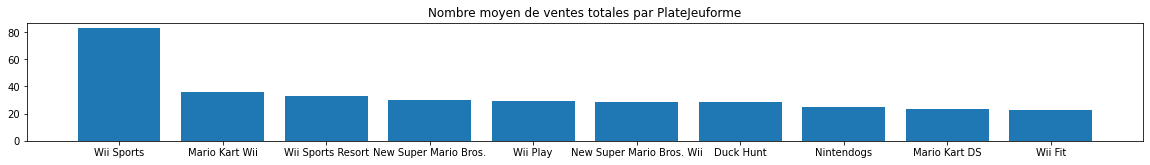

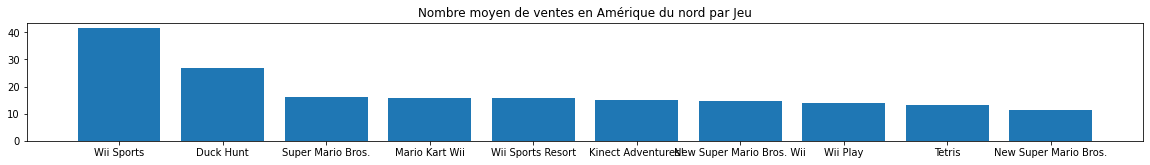

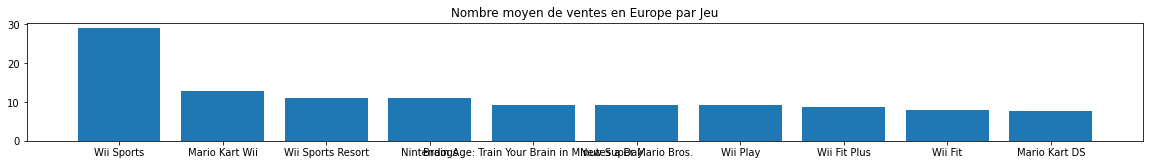

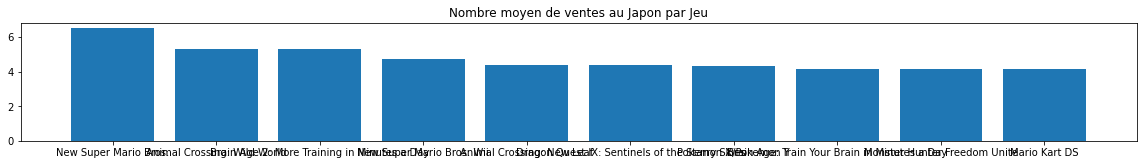

In [9]:
# Visualisation par Jeu

# Global 
salesByGameG = df_visu.groupby('Name').agg({'Global_Sales':'mean'}).sort_values(by='Global_Sales',ascending=False).head(10)
plt.figure(figsize=(20,10))
plt.subplot(4,1,1)
#plt.hist()
plt.bar(salesByGameG['Global_Sales'].index,salesByGameG['Global_Sales']);
plt.title('Nombre moyen de ventes totales par PlateJeuforme');

# NA 
salesByGameNA = df_visu.groupby('Name').agg({'NA_Sales':'mean'}).sort_values(by='NA_Sales',ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.subplot(4,1,2)
#plt.hist()
plt.bar(salesByGameNA['NA_Sales'].index,salesByGameNA['NA_Sales']);
#plt.bar(df.Genre,df.Global_Sales.mean());
plt.title('Nombre moyen de ventes en Amérique du nord par Jeu');

# EU
salesByGameEU = df_visu.groupby('Name').agg({'EU_Sales':'mean'}).sort_values(by='EU_Sales',ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.subplot(4,1,3)
#plt.hist()
plt.bar(salesByGameEU['EU_Sales'].index,salesByGameEU['EU_Sales']);
#plt.bar(df.Genre,df.Global_Sales.mean());
plt.title('Nombre moyen de ventes en Europe par Jeu');

# JP
salesByGameJP = df_visu.groupby('Name').agg({'JP_Sales':'mean'}).sort_values(by='JP_Sales',ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.subplot(4,1,4)
#plt.hist()
plt.bar(salesByGameJP['JP_Sales'].index,salesByGameJP['JP_Sales']);
#plt.bar(df.Genre,df.Global_Sales.mean());
plt.title('Nombre moyen de ventes au Japon par Jeu');


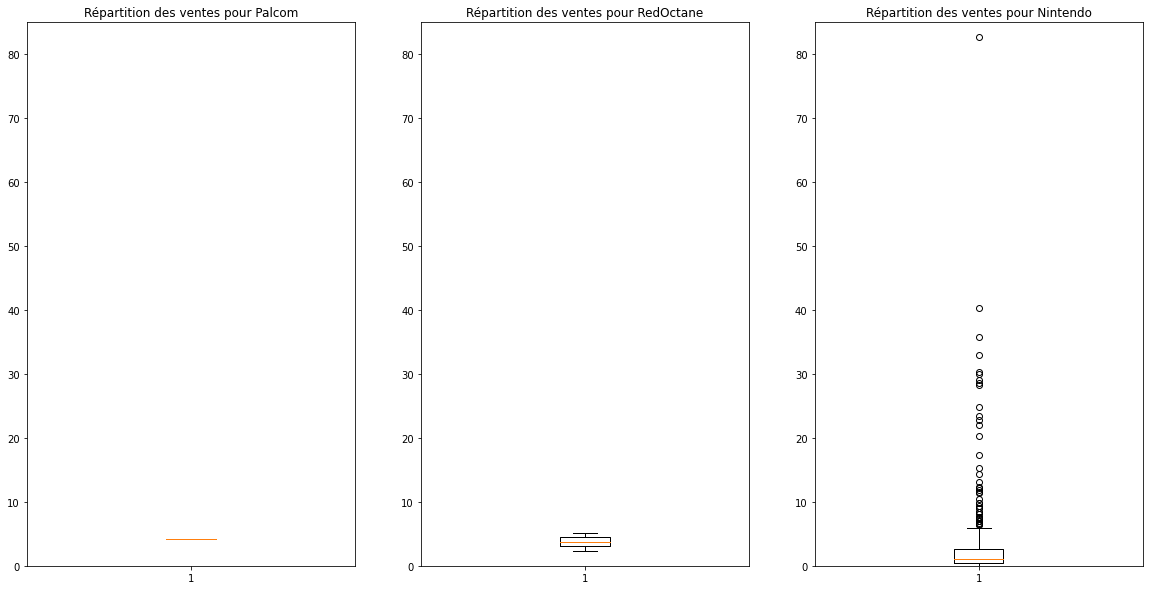

In [16]:
# Comparatif Palcom vs Nintendo

salesByPublisherG = df_visu.groupby('Publisher').agg({'Global_Sales':'mean'}).sort_values(by='Global_Sales',ascending=False).head(10)

# Palcom (Konami)
salesByPalcomGame = df_visu[df_visu['Publisher']=='Palcom']
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.ylim([0,85])
plt.boxplot(salesByPalcomGame['Global_Sales'])
#plt.bar(salesByPalcomGame['Name'],salesByPalcomGame['Global_Sales']);
plt.title('Répartition des ventes pour Palcom');

# RedOctane

salesByRedoctaneGame = df_visu[df_visu['Publisher']=='RedOctane']
plt.subplot(1,3,2)
plt.ylim([0,85])
plt.boxplot(salesByRedoctaneGame['Global_Sales'])
plt.title('Répartition des ventes pour RedOctane');

# Nintendo

salesByNintendoGame = df_visu[df_visu['Publisher']=='Nintendo']
plt.subplot(1,3,3)
plt.ylim([0,85])
#plt.plot(salesByNintendoGame['Name'],salesByNintendoGame['Global_Sales']);
#plt.plot(salesByNintendoGame['Global_Sales'].mean(),c='red');
plt.boxplot(salesByNintendoGame['Global_Sales'])
plt.title('Répartition des ventes pour Nintendo');

#salesByNintendoGame.info()
#print(len(df[df['Publisher']=='Nintendo']))
#df[df['Publisher']=='Nintendo']

In [30]:
salesByPalcomGame
salesByPalcomGame.mean()

Rank             277.00
Year            1989.00
NA_Sales           3.38
EU_Sales           0.44
JP_Sales           0.31
Other_Sales        0.04
Global_Sales       4.17
metaNote          44.00
metaNbVote        49.00
userNote           5.50
userNbVote       179.00
samename           1.00
dtype: float64

In [23]:
print(len(salesByRedoctaneGame))
salesByRedoctaneGame

2


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,metaNote,metaNbVote,userNote,userNbVote,samename
195,196,Guitar Hero II,PS2,2006.0,Misc,RedOctane,3.81,0.63,0.00,0.68,5.12,92,69,8.5,156,1
656,658,Guitar Hero,PS2,2005.0,Misc,RedOctane,1.67,0.61,0.03,0.07,2.38,91,65,8.6,209,1


In [29]:
print(len(salesByNintendoGame))
print(salesByNintendoGame.mean())
salesByNintendoGame.head(50)

474
Rank            3147.067511
Year            1991.725738
NA_Sales           1.344937
EU_Sales           0.695654
JP_Sales           0.630675
Other_Sales        0.165907
Global_Sales       2.837405
samename           1.000000
dtype: float64


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,metaNote,metaNbVote,userNote,userNbVote,samename
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76,51,8.1,453,1
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,84,14,8.5,98,1
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82,73,8.4,1047,1
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80,73,8.2,293,1
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,83,27,8.2,258,1
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,80,70,7.0,306,1
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,58,41,6.5,168,1
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,87,80,8.3,814,1
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,0,4,0,0,1
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76,83,54,7.6,121,1


In [ ]:
"""On constate que malgré le nombre de vente élevé de l'éditeur Nintendo, sa moyenne (2,83) se situe en dessous que des concurrents tels que Palcom et RedOctane
Ainsi, nous chercherons à définir quels sont les Best Sellers de Nintendo et de trouver une combinaison plateforme/genre/titre gagnante """